In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Karthaus/karthaus_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 120300 × 4915
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_R', 'celltypes'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'PatientNum_colors', 'batch_colors', 'celltypes_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

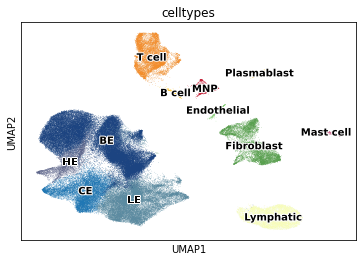

In [3]:
sc.pl.umap(adata, color = 'celltypes', legend_loc = 'on data', legend_fontoutline = 2)

In [5]:
from collections import defaultdict

sdata = defaultdict(dict)

In [6]:
interest = {
    'mnp':['MNP'],
    'lymphoid':['T cell', 'B cell', 'Plasmablast'],
    'epithelial':['BE', 'HE', 'CE', 'LE'],
}
for ct in interest.keys():
    sdata[ct] = adata[adata.obs['celltypes'].isin(interest[ct])].copy()

In [7]:
# save each file as h5ad
for x in sdata:
    sdata[x].write_h5ad('dataset/Karthaus/karthaus_processed_' + x + '.h5ad', compression = 'gzip')